# The Cancer Gene Atlas Cancer (TCGA) - Ovarian Serous Cystadenocarcinoma (OV)

Author: Moshe Silverstein <br>
Date: 7-17 <br>
Data Source: https://cancergenome.nih.gov/

In [1]:
import sys, datetime, os
import numpy as np
import pandas as pd
import importlib
import my_functions as mf
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

In [2]:
import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))

In [3]:
from clustergrammer_widget import *
net = Network(clustergrammer_widget)

In [4]:
importlib.reload(mf)

<module 'my_functions' from '/Users/moshesilverstein/Documents/Harmonizome/TCGA/my_functions.py'>

# Versions Of Modules In Use

In [5]:
%load_ext version_information
%version_information numpy, pandas, clustergrammer_widget, seaborn 

Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
IPython 5.3.0
OS Darwin 17.5.0 x86_64 i386 64bit
numpy 1.13.1
pandas 0.21.0
clustergrammer_widget 1.9.0
seaborn 0.7.1
Wed May 02 11:04:35 2018 EDT

# Functions

In [6]:
def getGenes(inputDF):
    
    inputDF.reset_index(inplace=True)
    
    inputDF.rename(columns={'index':'Gene Symbol'}, inplace=True)

    inputDF.set_index('Gene Symbol', inplace=True)

    lst = []

    for index in  inputDF.index:
        lst.append(index.split('|')[5])

    inputDF.index = lst

In [7]:
def getSampleID(inputDF, metaDF):
    
    lst = []
    
    for i,col in enumerate(inputDF.columns):

        progressPercent = ((i+1)/len(inputDF.columns))*100

        sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(inputDF.columns)))
        sys.stdout.flush()

        ID = ('-').join(metaDF.loc[col, 'a_AliquotBarcode'].split('-')[0:3])
        
        ID = ID+'-'+metaDF.loc[col, 'a_AliquotBarcode'].split('-')[3][0:2]

        lst.append(ID)

        
    inputDF.columns = lst

In [8]:
def getSampleData(inputDF, metaDF, SampleTypes):
    
    lst = []

    for i,col in enumerate(inputDF.columns):

        progressPercent = ((i+1)/len(inputDF.columns))*100

        sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(inputDF.columns)))
        sys.stdout.flush()
        
#         ID = ('-').join(meta.loc[col, 'a_AliquotBarcode'].split('-')[0:3])
        ID = ('-').join(col.split('-')[0:3])
        
        donor = 'Donor:'+ID
        
#         if '01' in str(col.split('-')[3]):
#             sampleType = 'Primary Solid Tumor'
#         elif '11' in str(col.split('-')[3]):
#             sampleType= 'Solid Tissue Normal'
        
        if ID in metaDF.index:
            info = (donor, 
                'Age:'+str(metaDF.loc[ID, 'age_at_initial_pathologic_diagnosis']),
                'Gender:'+str(metaDF.loc[ID, 'gender']),    
                'SampleType:'+SampleTypes[str(col.split('-')[3])],
                'Stage:'+str(metaDF.loc[ID, 'pathologic_stage']),
                'Histology:'+str(metaDF.loc[ID, 'histological_type']),
                'Tissue:'+str(metaDF.loc[ID, 'tumor_tissue_site']), 
                'Tumor:'+str(metaDF.loc[ID, 'tumor_type']),    
                'Grade'+str(metaDF.loc[ID, 'neoplasm_histologic_grade'])
#                 'SampleType:'+str(ID.split('-')[3])
               )
#             for col in metaDF.columns:
#                 if len(metaDF[col].dropna()) >= .5*len(metaDF[col]) and len(metaDF[col].unique()) > 2 and len(metaDF[col].unique()) < len(metaDF[col]) and 'age' not in col:
#                     info = info + (str(col)+':'+str(metaDF.loc[ID, col]),)
        lst.append(info)

        
    inputDF.columns = lst

In [9]:
SampleTypes ={
    '01':'Primary Solid Tumor',
    '02':'Recurrent Solid Tumor',
    '03':'Primary Blood Derived Cancer - Peripheral Blood',
    '04':'Recurrent Blood Derived Cancer - Bone Marrow',
    '05':'Additional - New Primary',
    '06':'Metastatic',
    '07':'Additional Metastatic',
    '08':'Human Tumor Original Cells',
    '09':'Primary Blood Derived Cancer - Bone Marrow',
    '10':'Blood Derived Normal',
    '11':'Solid Tissue Normal',
    '12':'Buccal Cell Normal',
    '13':'EBV Immortalized Normal',
    '14':'Bone Marrow Normal',
    '15':'sample type 15',
    '16':'sample type 16',
    '20':'Control Analyte',
    '40':'Recurrent Blood Derived Cancer - Peripheral Blood',
    '50':'Cell Lines',
    '60':'Primary Xenograft Tissue',
    '61':'Cell Line Derived Xenograft Tissue',
    '99':'sample type 99'
             }

# Path to Output Files

In [10]:
path = '/Users/moshesilverstein/Documents/Harmonizome/TCGA/Output/'

# Load Meta Data

In [11]:
meta = pd.read_csv('Input/TCGA_Metadata.csv', index_col=9)

In [12]:
meta.head()

,a_AliquotBarcode,b_disease,a_objectSizeBytes,b_uploaded,b_state,b_library_type,b_center,b_assembly,a_GCSobject
a_CGHubAnalysisID,,,,,,,,,
3a8e6a74-137f-468f-8987-fa0acdde2836,TCGA-CS-6188-01A-11R-1896-07,LGG,6354301047,8/14/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
c63d44f1-c9ad-4391-b1aa-0feb3713441b,TCGA-EO-A22Y-01A-11R-A180-07,UCEC,5497637066,8/29/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
21912089-1e42-4bcc-9ad9-fe9a9b88fb09,TCGA-94-A5I4-01A-11R-A26W-07,LUSC,4600317850,8/29/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
6b86e544-0372-434a-9f28-6fa4075dd228,TCGA-N5-A4RV-01A-21R-A28V-07,UCS,4964387768,8/30/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
30518eb4-2783-4988-bcd4-36a1a8bb4dfa,TCGA-BK-A56F-01A-32R-A27V-07,UCEC,5668623460,8/31/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...


In [13]:
meta.shape

(11373, 9)

# Load Sample MetaData

In [14]:
sample_meta = pd.read_csv('Input/metadata_Ovarian serous cystadenocarcinoma [OV]', sep='\t', index_col=1)

In [15]:
sample_meta.head()

,Unnamed: 0,Study,Project,ParticipantUUID,TSSCode,age_at_initial_pathologic_diagnosis,anatomic_neoplasm_subdivision,batch_number,bcr,clinical_M,...,BMI,age_began_smoking_in_years,h_pylori_infection,other_dx,other_malignancy_anatomic_site,other_malignancy_histological_type,other_malignancy_malignancy_type,stopped_smoking_year,venous_invasion,year_of_tobacco_smoking_onset
ParticipantBarcode,,,,,,,,,,,,,,,,,,,,,
TCGA-13-A5FU,5041,OV,TCGA,0F7AC6CA-7806-4B2A-9D37-94FF74FCD010,13,60.0,Bilateral,409,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-09-0366,5158,OV,TCGA,23771dab-2aab-4d2b-95e2-9af7092cee6b,09,55.0,Bilateral,9,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN
TCGA-24-2290,5159,OV,TCGA,2b14123b-8fcd-402c-9399-4e7c47f20252,24,56.0,NaN,24,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-24-2293,5160,OV,TCGA,bdd792e7-d75f-4aa3-b38e-f0708e112075,24,47.0,Right,24,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-29-A5NZ,5161,OV,TCGA,F1CB3D48-1415-408D-89D1-DFDCC5924963,29,66.0,NaN,409,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
sample_meta.shape

(587, 70)

# Load Data

In [17]:
matrix = pd.read_csv('Input/TCGA_OV_tpm.tsv', sep='\t', index_col=0)

In [18]:
matrix.head()

,fae491ab-42b1-413e-b0ff-aa881eb3517e,7afe8a3d-b42a-4c9a-837e-ab0b8711ee44,bd41de75-cd48-4cbd-ace0-ebe960601fea,1338f5b3-a219-4303-880d-c52c57a2f25a,c736476f-9e1c-42dc-9be1-923d5d9f210e,c91289a6-9e18-4587-84e8-2f4b631a8cce,2ee608c1-985c-41b1-8fa8-4fa02516aab6,e8a88ddf-7d80-45ac-a2a9-96adf919913d,2f7bbf75-780b-4e4c-8641-c4fa2429f520,9ca03195-c8b5-4392-9229-0fcd32a2a718,...,28a4bd90-d313-406b-bdf2-32027b2bb650,b2904a9d-c557-425d-b29a-73a6ebbcb510,0d13688b-c61d-43d9-94ef-12b82dd7ef24,5abbe401-9757-484b-9503-ab898d43abaf,07b5c2a3-f9cc-4b01-99b8-abaf559dc765,014b8bef-fc8f-4b4b-9be1-9745cf7a82ba,b06c98f1-39de-4fdc-8f6a-7242317de9bb,95896b1e-63e2-49d2-a526-95493556fe65,46338f2f-9d7d-4c0b-8792-b6b8feb19ca7,5cb6bc65-9cd5-45ac-9078-551bc7408906
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,130.522000,246.776000,154.876000,184.694000,212.993000,155.48900,75.014700,62.629500,318.56900,164.95600,...,117.95900,112.064000,74.41660,89.029400,171.64800,113.23900,100.28800,78.524300,149.816000,117.69800
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,28.590300,9.454340,19.032800,21.539200,18.578400,6.13291,2.872300,5.586890,16.08120,7.53793,...,51.60150,22.833800,45.81080,11.727200,4.46208,1.69276,59.17010,23.046200,16.821300,44.61670
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,7.990090,5.735010,5.337670,4.136680,3.379860,4.73070,1.509880,3.319900,5.15213,3.29524,...,2.38553,17.416700,2.91168,3.825160,10.69970,6.76036,4.95083,9.526710,12.693800,8.74098
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,48.813900,29.510000,39.130000,87.138900,59.309800,34.47700,11.267800,25.126200,37.93550,48.83190,...,89.56230,50.398900,51.18500,116.559000,74.42400,12.45430,80.15770,61.342000,38.031400,107.61900
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,0.209808,0.219953,0.124723,0.092804,0.107352,0.00000,0.016966,0.023879,0.20565,0.00000,...,1.54948,0.143578,1.47294,0.744724,0.00000,0.00000,3.73326,0.697626,0.887179,0.00000


In [19]:
matrix.shape

(199169, 430)

# Get Only Protein Coding Genes

In [20]:
lst = []

for i,index in enumerate(matrix.index):
    
    progressPercent = ((i+1)/len(matrix.index)*100)

    sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(matrix.index)))
    sys.stdout.flush()
                                 
    lst.append(index.split('|')[7])    
                       
matrix['Gene Type'] = lst

matrix = matrix[matrix['Gene Type'] == 'protein_coding']

matrix.drop('Gene Type', axis=1, inplace=True)

In [21]:
matrix.head()

,fae491ab-42b1-413e-b0ff-aa881eb3517e,7afe8a3d-b42a-4c9a-837e-ab0b8711ee44,bd41de75-cd48-4cbd-ace0-ebe960601fea,1338f5b3-a219-4303-880d-c52c57a2f25a,c736476f-9e1c-42dc-9be1-923d5d9f210e,c91289a6-9e18-4587-84e8-2f4b631a8cce,2ee608c1-985c-41b1-8fa8-4fa02516aab6,e8a88ddf-7d80-45ac-a2a9-96adf919913d,2f7bbf75-780b-4e4c-8641-c4fa2429f520,9ca03195-c8b5-4392-9229-0fcd32a2a718,...,28a4bd90-d313-406b-bdf2-32027b2bb650,b2904a9d-c557-425d-b29a-73a6ebbcb510,0d13688b-c61d-43d9-94ef-12b82dd7ef24,5abbe401-9757-484b-9503-ab898d43abaf,07b5c2a3-f9cc-4b01-99b8-abaf559dc765,014b8bef-fc8f-4b4b-9be1-9745cf7a82ba,b06c98f1-39de-4fdc-8f6a-7242317de9bb,95896b1e-63e2-49d2-a526-95493556fe65,46338f2f-9d7d-4c0b-8792-b6b8feb19ca7,5cb6bc65-9cd5-45ac-9078-551bc7408906
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,130.522000,246.776000,154.876000,184.694000,212.993000,155.48900,75.014700,62.629500,318.56900,164.95600,...,117.95900,112.064000,74.41660,89.029400,171.64800,113.23900,100.28800,78.524300,149.816000,117.69800
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,28.590300,9.454340,19.032800,21.539200,18.578400,6.13291,2.872300,5.586890,16.08120,7.53793,...,51.60150,22.833800,45.81080,11.727200,4.46208,1.69276,59.17010,23.046200,16.821300,44.61670
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,7.990090,5.735010,5.337670,4.136680,3.379860,4.73070,1.509880,3.319900,5.15213,3.29524,...,2.38553,17.416700,2.91168,3.825160,10.69970,6.76036,4.95083,9.526710,12.693800,8.74098
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,48.813900,29.510000,39.130000,87.138900,59.309800,34.47700,11.267800,25.126200,37.93550,48.83190,...,89.56230,50.398900,51.18500,116.559000,74.42400,12.45430,80.15770,61.342000,38.031400,107.61900
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,0.209808,0.219953,0.124723,0.092804,0.107352,0.00000,0.016966,0.023879,0.20565,0.00000,...,1.54948,0.143578,1.47294,0.744724,0.00000,0.00000,3.73326,0.697626,0.887179,0.00000


In [22]:
matrix.shape

(79930, 430)

# Map Sample Meta Data to Sample ID

In [23]:
getSampleID(matrix, meta)

In [24]:
matrix.head()

,TCGA-13-0801-01,TCGA-13-0911-01,TCGA-13-0913-01,TCGA-13-0923-01,TCGA-13-0924-01,TCGA-23-1021-01,TCGA-23-1022-01,TCGA-23-1023-01,TCGA-23-1032-01,TCGA-23-1107-01,...,TCGA-OY-A56Q-01,TCGA-VG-A8LO-01,TCGA-OY-A56P-01,TCGA-5X-AA5U-01,TCGA-3P-A9WA-01,TCGA-30-1857-01,TCGA-29-A5NZ-01,TCGA-13-A5FT-01,TCGA-59-A5PD-01,TCGA-WR-A838-01
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,130.522000,246.776000,154.876000,184.694000,212.993000,155.48900,75.014700,62.629500,318.56900,164.95600,...,117.95900,112.064000,74.41660,89.029400,171.64800,113.23900,100.28800,78.524300,149.816000,117.69800
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,28.590300,9.454340,19.032800,21.539200,18.578400,6.13291,2.872300,5.586890,16.08120,7.53793,...,51.60150,22.833800,45.81080,11.727200,4.46208,1.69276,59.17010,23.046200,16.821300,44.61670
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,7.990090,5.735010,5.337670,4.136680,3.379860,4.73070,1.509880,3.319900,5.15213,3.29524,...,2.38553,17.416700,2.91168,3.825160,10.69970,6.76036,4.95083,9.526710,12.693800,8.74098
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,48.813900,29.510000,39.130000,87.138900,59.309800,34.47700,11.267800,25.126200,37.93550,48.83190,...,89.56230,50.398900,51.18500,116.559000,74.42400,12.45430,80.15770,61.342000,38.031400,107.61900
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,0.209808,0.219953,0.124723,0.092804,0.107352,0.00000,0.016966,0.023879,0.20565,0.00000,...,1.54948,0.143578,1.47294,0.744724,0.00000,0.00000,3.73326,0.697626,0.887179,0.00000


# Map Gene Symbol to Gene ID

In [25]:
getGenes(matrix)

In [26]:
matrix.head()

,TCGA-13-0801-01,TCGA-13-0911-01,TCGA-13-0913-01,TCGA-13-0923-01,TCGA-13-0924-01,TCGA-23-1021-01,TCGA-23-1022-01,TCGA-23-1023-01,TCGA-23-1032-01,TCGA-23-1107-01,...,TCGA-OY-A56Q-01,TCGA-VG-A8LO-01,TCGA-OY-A56P-01,TCGA-5X-AA5U-01,TCGA-3P-A9WA-01,TCGA-30-1857-01,TCGA-29-A5NZ-01,TCGA-13-A5FT-01,TCGA-59-A5PD-01,TCGA-WR-A838-01
ARF5,130.522000,246.776000,154.876000,184.694000,212.993000,155.48900,75.014700,62.629500,318.56900,164.95600,...,117.95900,112.064000,74.41660,89.029400,171.64800,113.23900,100.28800,78.524300,149.816000,117.69800
M6PR,28.590300,9.454340,19.032800,21.539200,18.578400,6.13291,2.872300,5.586890,16.08120,7.53793,...,51.60150,22.833800,45.81080,11.727200,4.46208,1.69276,59.17010,23.046200,16.821300,44.61670
ESRRA,7.990090,5.735010,5.337670,4.136680,3.379860,4.73070,1.509880,3.319900,5.15213,3.29524,...,2.38553,17.416700,2.91168,3.825160,10.69970,6.76036,4.95083,9.526710,12.693800,8.74098
FKBP4,48.813900,29.510000,39.130000,87.138900,59.309800,34.47700,11.267800,25.126200,37.93550,48.83190,...,89.56230,50.398900,51.18500,116.559000,74.42400,12.45430,80.15770,61.342000,38.031400,107.61900
CYP26B1,0.209808,0.219953,0.124723,0.092804,0.107352,0.00000,0.016966,0.023879,0.20565,0.00000,...,1.54948,0.143578,1.47294,0.744724,0.00000,0.00000,3.73326,0.697626,0.887179,0.00000


# Histogram of First Sample

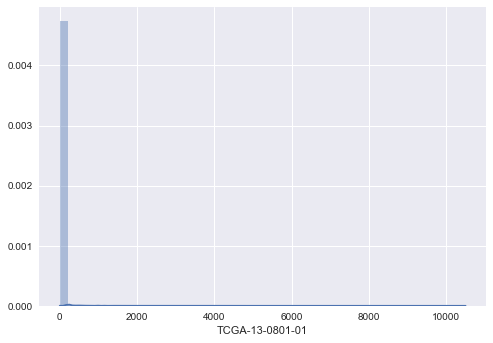

In [27]:
sns.distplot(matrix.iloc[:, 0]);

# Histogram of First Gene

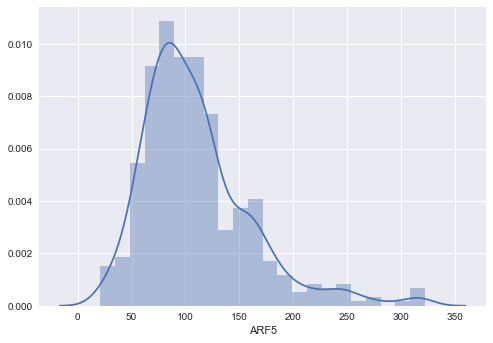

In [28]:
sns.distplot(matrix.iloc[0, :]);

# Save Unfiltered Matrix to File

In [29]:
filename = path+'tcga_ov_matrix_unfilltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
matrix.to_csv(filename, sep='\t', compression='gzip')

# Filtered

In [30]:
normalized_matrix = matrix.copy()

In [31]:
normalized_matrix = normalized_matrix.groupby(level=0).max()

# Remove any data with more than 95% missing and imput remaining mssing values to matrix mean

In [32]:
normalized_matrix = mf.removeAndImpute(normalized_matrix)

In [33]:
normalized_matrix.head()

,TCGA-13-0801-01,TCGA-13-0911-01,TCGA-13-0913-01,TCGA-13-0923-01,TCGA-13-0924-01,TCGA-23-1021-01,TCGA-23-1022-01,TCGA-23-1023-01,TCGA-23-1032-01,TCGA-23-1107-01,...,TCGA-OY-A56Q-01,TCGA-VG-A8LO-01,TCGA-OY-A56P-01,TCGA-5X-AA5U-01,TCGA-3P-A9WA-01,TCGA-30-1857-01,TCGA-29-A5NZ-01,TCGA-13-A5FT-01,TCGA-59-A5PD-01,TCGA-WR-A838-01
A1BG,0.027529,0.039506,0.039506,0.039506,0.039506,0.039506,0.022013,0.039506,0.039506,0.039506,...,0.015980,0.039506,0.045997,0.039506,0.039506,0.039506,0.039506,0.039506,0.039506,0.039506
A1CF,0.001534,0.002014,0.009070,0.009496,0.002271,0.017213,0.002518,0.003814,0.004294,0.005595,...,0.009297,0.040717,0.035970,0.028495,0.011943,0.010487,0.030594,0.009722,0.012674,0.056925
A2M,35.627300,21.504500,41.027500,30.819800,93.445000,29.014500,7.884770,30.501100,4.726700,13.950300,...,115.101000,20.434900,108.001000,30.563800,51.420800,21.270500,72.185600,49.685600,15.272500,46.341700
A2ML1,3.978200,0.006528,0.065753,0.169365,0.122645,0.084585,0.040497,0.271949,0.074610,0.210937,...,1.844190,0.126334,0.822618,0.160691,0.154200,0.110542,0.326585,0.049896,0.150853,1.344920
A3GALT2,0.029514,0.088282,0.192306,0.033534,0.129187,0.129187,0.021591,0.012753,0.189216,0.204585,...,0.070053,0.113389,0.014909,0.190424,0.294383,0.115035,0.121125,0.078360,0.146411,0.039051


In [34]:
normalized_matrix.shape

(19141, 430)

# logCPM Transform

Raw counts were normalized to log10-Counts Per Million (logCPM) by dividing each column by the total sum of its counts, multiplying it by 106, followed by the application of a log10-transform.

In [35]:
samples = normalized_matrix.columns.tolist()

In [36]:
normalized_matrix.columns = np.arange(0, len(normalized_matrix.columns))

In [37]:
for col in normalized_matrix.columns:

    total = normalized_matrix[col].sum()
    
    normalized_matrix[col] = normalized_matrix[col].apply(lambda x: np.log10(((x)/total)*10**6))

In [38]:
normalized_matrix.columns = samples

In [39]:
normalized_matrix.head()

,TCGA-13-0801-01,TCGA-13-0911-01,TCGA-13-0913-01,TCGA-13-0923-01,TCGA-13-0924-01,TCGA-23-1021-01,TCGA-23-1022-01,TCGA-23-1023-01,TCGA-23-1032-01,TCGA-23-1107-01,...,TCGA-OY-A56Q-01,TCGA-VG-A8LO-01,TCGA-OY-A56P-01,TCGA-5X-AA5U-01,TCGA-3P-A9WA-01,TCGA-30-1857-01,TCGA-29-A5NZ-01,TCGA-13-A5FT-01,TCGA-59-A5PD-01,TCGA-WR-A838-01
A1BG,-1.292900,-1.137685,-1.068769,-1.141813,-1.154788,-1.173300,-1.021351,-0.805756,-1.105814,-1.180915,...,-1.570425,-1.184922,-1.049143,-1.106032,-1.122994,-1.066680,-1.155942,-1.144202,-1.143976,-1.164622
A1CF,-2.546822,-2.430358,-1.707821,-1.760940,-2.395260,-1.534101,-1.962898,-1.821012,-2.069613,-2.029754,...,-1.805629,-1.171811,-1.155927,-1.247924,-1.642549,-1.642697,-1.266971,-1.753113,-1.637730,-1.005978
A2M,1.819096,1.598183,1.947645,1.750356,2.219107,1.692655,1.532766,2.081898,0.972083,1.367007,...,2.287088,1.528790,2.321557,1.782514,1.991484,1.664437,2.105848,1.955368,1.443273,1.904689
A2ML1,0.867000,-1.919538,-0.847515,-0.509650,-0.662799,-0.842665,-0.756599,0.032070,-0.829677,-0.453423,...,0.491814,-0.680062,0.203327,-0.496701,-0.531571,-0.619813,-0.238607,-1.042798,-0.562083,0.367413
A3GALT2,-1.262662,-0.788475,-0.381437,-1.212988,-0.640230,-0.658742,-1.029742,-1.296795,-0.425517,-0.466702,...,-0.928563,-0.727012,-1.538420,-0.422971,-0.250742,-0.602510,-0.669369,-0.846766,-0.575063,-1.169657


# Normalize Matrix (Quantile Normalize the matrix for the columns)

In [40]:
normalized_matrix = mf.quantileNormalize(normalized_matrix)

In [41]:
normalized_matrix.head()

,TCGA-13-0801-01,TCGA-13-0911-01,TCGA-13-0913-01,TCGA-13-0923-01,TCGA-13-0924-01,TCGA-23-1021-01,TCGA-23-1022-01,TCGA-23-1023-01,TCGA-23-1032-01,TCGA-23-1107-01,...,TCGA-OY-A56Q-01,TCGA-VG-A8LO-01,TCGA-OY-A56P-01,TCGA-5X-AA5U-01,TCGA-3P-A9WA-01,TCGA-30-1857-01,TCGA-29-A5NZ-01,TCGA-13-A5FT-01,TCGA-59-A5PD-01,TCGA-WR-A838-01
A1BG,-1.001895,-1.044236,-1.007593,-1.047105,-1.101165,-1.111345,-0.945843,-0.860606,-0.951702,-1.067513,...,-1.515171,-1.161557,-1.096071,-1.193030,-1.238422,-1.064327,-1.242722,-1.140928,-1.134781,-1.216660
A1CF,-2.124517,-2.426088,-1.565413,-1.699053,-2.294351,-1.491875,-1.812265,-1.839424,-1.819863,-2.029876,...,-1.757265,-1.151544,-1.191390,-1.320127,-1.860199,-1.653638,-1.345229,-1.742912,-1.627342,-1.068637
A2M,1.837575,1.622746,1.925960,1.808165,2.149694,1.889903,1.642638,2.045732,1.048295,1.550165,...,2.322118,1.487402,2.317726,1.618946,1.848255,1.750631,1.981621,1.954865,1.249637,1.880585
A2ML1,1.049950,-1.892687,-0.788879,-0.341348,-0.584577,-0.721840,-0.636866,0.019222,-0.661185,-0.161018,...,0.448609,-0.681900,0.078086,-0.642118,-0.612360,-0.595668,-0.481900,-1.043950,-0.577572,0.290535
A3GALT2,-0.971344,-0.646884,-0.342876,-1.127253,-0.561512,-0.499998,-0.957458,-1.350471,-0.259969,-0.175121,...,-0.875149,-0.732468,-1.572746,-0.569515,-0.317490,-0.577572,-0.854694,-0.868495,-0.590148,-1.222190


# Normalize Matrix (z-score the rows)

In [42]:
mf.zscore(normalized_matrix, 'row')

In [43]:
normalized_matrix.head()

,TCGA-13-0801-01,TCGA-13-0911-01,TCGA-13-0913-01,TCGA-13-0923-01,TCGA-13-0924-01,TCGA-23-1021-01,TCGA-23-1022-01,TCGA-23-1023-01,TCGA-23-1032-01,TCGA-23-1107-01,...,TCGA-OY-A56Q-01,TCGA-VG-A8LO-01,TCGA-OY-A56P-01,TCGA-5X-AA5U-01,TCGA-3P-A9WA-01,TCGA-30-1857-01,TCGA-29-A5NZ-01,TCGA-13-A5FT-01,TCGA-59-A5PD-01,TCGA-WR-A838-01
A1BG,0.749026,0.408980,0.703269,0.385934,-0.048240,-0.129993,1.199196,1.883755,1.152143,0.222030,...,-3.373232,-0.533262,-0.007321,-0.786033,-1.150584,0.247616,-1.185116,-0.367582,-0.318217,-0.975807
A1CF,-1.575454,-2.608188,0.339206,-0.118448,-2.157054,0.591038,-0.506142,-0.599149,-0.532162,-1.251354,...,-0.317795,1.756506,1.620054,1.179191,-0.670295,0.037078,1.093227,-0.268643,0.127128,2.040420
A2M,-0.264441,-0.961411,0.022309,-0.359854,0.748173,-0.094670,-0.896875,0.410888,-2.825112,-1.196888,...,1.307570,-1.400511,1.293321,-0.973742,-0.229792,-0.546513,0.202892,0.116086,-2.171897,-0.124903
A2ML1,3.541407,-3.101866,-0.609917,0.400423,-0.148687,-0.458571,-0.266734,1.214445,-0.321638,0.807535,...,2.183824,-0.368404,1.347335,-0.278592,-0.211410,-0.173725,0.083114,-1.185763,-0.132873,1.826958
A3GALT2,-0.595605,0.206238,0.957537,-0.980906,0.417218,0.569240,-0.561288,-1.532548,1.162428,1.372112,...,-0.357878,-0.005268,-2.081859,0.397442,1.020274,0.377530,-0.307327,-0.341433,0.346450,-1.215525


# Merge Like Column (by taking the mean)

In [44]:
normalized_matrix = mf.merge(normalized_matrix, 'column', 'mean')

In [45]:
normalized_matrix.shape

(19141, 429)

# Map Gene Symbols To Up-to-date Approved Gene Symbols

In [46]:
mf.mapgenesymbols(normalized_matrix)

In [47]:
normalized_matrix.shape

(18710, 429)

# Merge Duplicate Genes By Rows

In [48]:
normalized_matrix = mf.merge(normalized_matrix, 'row', 'mean')

In [49]:
normalized_matrix.shape

(18621, 429)

# Histogram of First Sample

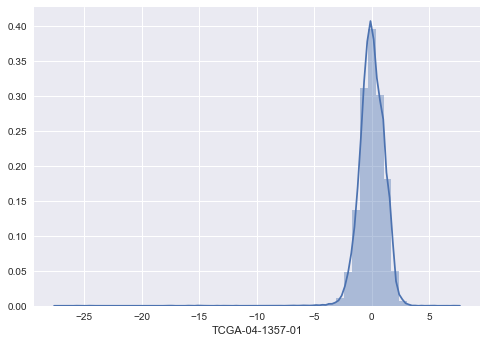

In [50]:
sns.distplot(normalized_matrix.iloc[:, 10]);

# Histogram of First Gene

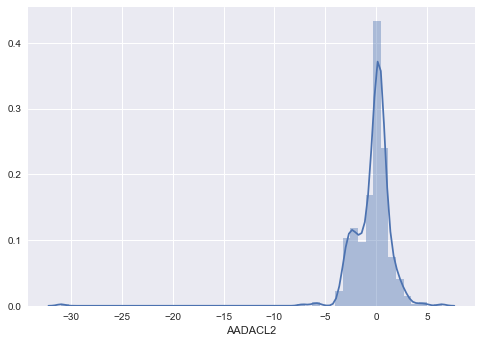

In [51]:
sns.distplot(normalized_matrix.iloc[10, :]);

# Save Filtered Matrix

In [52]:
filename = path+'tcga_ov_matrix_filltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
normalized_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene List

In [53]:
gene_list = mf.createGeneList(normalized_matrix)

In [54]:
gene_list.head()

,GeneSym,GeneID
0,A1BG,1
1,A1CF,29974
2,A2M,2
3,A2ML1,144568
4,A3GALT2,127550


In [55]:
gene_list.shape

(18621, 2)

# Save Gene List

In [56]:
filename = path+'tcga_ov_gene_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_list.to_csv(filename, sep='\t', compression='gzip')

# Create Attribute List

In [57]:
metaData = pd.DataFrame(index=normalized_matrix.columns)

for index in metaData.index:
    if ('-').join(index.split('-')[0:3]) in sample_meta.index:
        metaData.loc[index, 'Age'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'age_at_initial_pathologic_diagnosis']
        metaData.loc[index, 'Gender'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'gender']
        metaData.loc[index, 'Pathologic M'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_M']
        metaData.loc[index, 'Pathologic N'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_N']
        metaData.loc[index, 'Pathologic T'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_T']
        metaData.loc[index, 'Pathologic Stage'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_stage']
        metaData.loc[index, 'Histological Type'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'histological_type']
        metaData.loc[index, 'Sample Type'] = SampleTypes[str(index.split('-')[3])]
        metaData.loc[index, 'Tumor Tissue Site'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'tumor_tissue_site']
        metaData.loc[index, 'Neoplasm Histologic Grade'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'neoplasm_histologic_grade']
    else:
        metaData.loc[index, 'Age'] = np.nan
        metaData.loc[index, 'Gender'] = np.nan
        metaData.loc[index, 'Pathologic M'] = np.nan
        metaData.loc[index, 'Pathologic N'] = np.nan
        metaData.loc[index, 'Pathologic T'] = np.nan
        metaData.loc[index, 'Pathologic Stage'] = np.nan
        metaData.loc[index, 'Histological Type'] = np.nan
        metaData.loc[index, 'Sample Type'] = SampleTypes[str(index.split('-')[3])]
        metaData.loc[index, 'Tumor Tissue Site'] = np.nan
        metaData.loc[index, 'Neoplasm Histologic Grade'] = np.nan

In [58]:
attribute_list = mf.createAttributeList(normalized_matrix, metaData)

In [59]:
attribute_list.head()

,Age,Gender,Pathologic M,Pathologic N,Pathologic T,Pathologic Stage,Histological Type,Sample Type,Tumor Tissue Site,Neoplasm Histologic Grade
Attributes,,,,,,,,,,
TCGA-04-1331-01,78,FEMALE,NaN,NaN,NaN,NaN,Serous Cystadenocarcinoma,Primary Solid Tumor,Ovary,G3
TCGA-04-1332-01,70,FEMALE,NaN,NaN,NaN,NaN,Serous Cystadenocarcinoma,Primary Solid Tumor,Ovary,G3
TCGA-04-1337-01,78,FEMALE,NaN,NaN,NaN,NaN,Serous Cystadenocarcinoma,Primary Solid Tumor,Ovary,G2
TCGA-04-1338-01,78,FEMALE,NaN,NaN,NaN,NaN,Serous Cystadenocarcinoma,Primary Solid Tumor,Ovary,G3
TCGA-04-1341-01,85,FEMALE,NaN,NaN,NaN,NaN,Serous Cystadenocarcinoma,Primary Solid Tumor,Ovary,G3


In [60]:
attribute_list.shape

(429, 10)

# Save Attribute List

In [61]:
filename = path+'tcga_ov_attribute_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_list.to_csv(filename, sep='\t', compression='gzip')

# Create matrix of Standardized values (values between -1, and 1)

In [62]:
standard_matrix = mf.createStandardizedMatrix(normalized_matrix)

In [63]:
standard_matrix.head()

,TCGA-04-1331-01,TCGA-04-1332-01,TCGA-04-1337-01,TCGA-04-1338-01,TCGA-04-1341-01,TCGA-04-1343-01,TCGA-04-1347-01,TCGA-04-1348-01,TCGA-04-1350-01,TCGA-04-1356-01,...,TCGA-61-2102-01,TCGA-61-2104-01,TCGA-61-2109-01,TCGA-61-2110-01,TCGA-61-2111-01,TCGA-61-2113-01,TCGA-OY-A56P-01,TCGA-OY-A56Q-01,TCGA-VG-A8LO-01,TCGA-WR-A838-01
,,,,,,,,,,,,,,,,,,,,,
A1BG,-0.701460,0.958387,-0.864611,-0.058421,0.697010,0.225952,0.589647,-0.873937,0.813658,-0.235480,...,-0.692149,-0.664227,-0.077049,-0.771384,-0.547713,-0.454526,-0.011795,-0.892577,-0.365996,-0.543053
A1CF,0.486912,-0.916004,0.034653,-0.212339,-0.738922,-0.184379,-0.790178,0.379665,0.053294,-0.025898,...,0.556881,0.258415,0.440283,0.976910,-0.282248,0.552215,0.930222,-0.240284,0.939580,0.967582
A2M,0.408550,0.865740,0.170710,-0.407229,-0.947732,-0.304716,-0.943055,-0.029686,-0.998843,-0.779975,...,0.781748,0.660336,0.445835,-0.817267,0.366572,0.268620,0.828399,0.837736,-0.821912,-0.118269
A2ML1,0.653278,0.714009,-0.409613,0.676609,-0.614616,-0.675183,0.541370,-0.162626,0.490072,0.261560,...,-0.069407,-0.400314,-0.740432,-0.213852,-0.064780,-0.670525,0.662598,0.858676,-0.288435,0.779352
A3GALT2,-0.112044,-0.084076,-0.037434,-0.214545,-0.764427,0.853331,0.051107,-0.745782,-0.699169,-0.424285,...,0.372808,-0.605988,0.825290,0.158312,0.652590,0.400799,-0.927545,-0.275130,-0.018785,-0.675873


# Plot of a Single Celltype, Normalized Value vs. Standardized Value

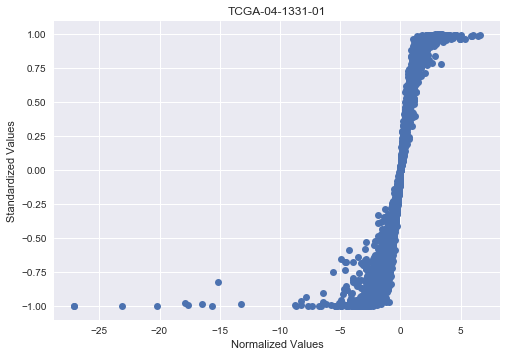

In [64]:
plt.plot(normalized_matrix[normalized_matrix.columns[0]], standard_matrix[standard_matrix.columns[0]], 'bo')
plt.xlabel('Normalized Values')
plt.ylabel('Standardized Values')
plt.title(standard_matrix.columns[0])
plt.grid(True)

# Save Standardized Matrix

In [65]:
filename = path+'tcga_ov_standard_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
standard_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Tertiary Matrix

In [66]:
tertiary_matrix = mf.createTertiaryMatrix(standard_matrix)

In [67]:
tertiary_matrix.head()

,TCGA-04-1331-01,TCGA-04-1332-01,TCGA-04-1337-01,TCGA-04-1338-01,TCGA-04-1341-01,TCGA-04-1343-01,TCGA-04-1347-01,TCGA-04-1348-01,TCGA-04-1350-01,TCGA-04-1356-01,...,TCGA-61-2102-01,TCGA-61-2104-01,TCGA-61-2109-01,TCGA-61-2110-01,TCGA-61-2111-01,TCGA-61-2113-01,TCGA-OY-A56P-01,TCGA-OY-A56Q-01,TCGA-VG-A8LO-01,TCGA-WR-A838-01
,,,,,,,,,,,,,,,,,,,,,
A1BG,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1CF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
A2M,0,0,0,0,0,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
A2ML1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A3GALT2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Save Teriary Matrix

In [68]:
filename = path+'tcga_ov_tertiary_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
tertiary_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Up Gene Set Library

In [69]:
name = 'tcga_ov_gene_up_set'

In [70]:
mf.createUpGeneSetLib(tertiary_matrix, path, name)

# Create Down Gene Set Library

In [71]:
name = 'tcga_ov_gene_down_set'

In [72]:
mf.createDownGeneSetLib(tertiary_matrix, path, name)

# Create Up Attribute Library

In [73]:
name = 'tcga_ov_attribute_up_set'

In [74]:
mf.createUpAttributeSetLib(tertiary_matrix, path, name)

# Create Down Attribute Library

In [75]:
name = 'tcga_ov_attribute_down_set'

In [76]:
mf.createDownAttributeSetLib(tertiary_matrix, path, name)

# Create Attribute Similarity Matrix

In [77]:
attribute_normalized_matrix = normalized_matrix.copy()

In [78]:
getSampleData(attribute_normalized_matrix, sample_meta, SampleTypes)

In [79]:
attribute_similarity_matix = mf.createSimilarityMatrix(attribute_normalized_matrix.T, 'cosine')

In [80]:
attribute_similarity_matix.head()

,"(Donor:TCGA-04-1331, Age:78.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Serous Cystadenocarcinoma, Tissue:Ovary, Tumor:nan, GradeG3)","(Donor:TCGA-04-1332, Age:70.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Serous Cystadenocarcinoma, Tissue:Ovary, Tumor:nan, GradeG3)","(Donor:TCGA-04-1337, Age:78.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Serous Cystadenocarcinoma, Tissue:Ovary, Tumor:nan, GradeG2)","(Donor:TCGA-04-1338, Age:78.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Serous Cystadenocarcinoma, Tissue:Ovary, Tumor:nan, GradeG3)","(Donor:TCGA-04-1341, Age:85.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Serous Cystadenocarcinoma, Tissue:Ovary, Tumor:nan, GradeG3)","(Donor:TCGA-04-1343, Age:72.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Serous Cystadenocarcinoma, Tissue:Ovary, Tumor:nan, GradeG3)","(Donor:TCGA-04-1347, Age:81.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Serous Cystadenocarcinoma, Tissue:Ovary, Tumor:nan, GradeG3)","(Donor:TCGA-04-1348, Age:44.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Serous Cystadenocarcinoma, Tissue:Ovary, Tumor:nan, GradeG3)","(Donor:TCGA-04-1350, Age:46.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Serous Cystadenocarcinoma, Tissue:Ovary, Tumor:nan, GradeG3)","(Donor:TCGA-04-1356, Age:62.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Serous Cystadenocarcinoma, Tissue:Ovary, Tumor:nan, GradeG3)",...,"(Donor:TCGA-61-2102, Age:74.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Serous Cystadenocarcinoma, Tissue:Ovary, Tumor:nan, GradeG3)","(Donor:TCGA-61-2104, Age:53.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Serous Cystadenocarcinoma, Tissue:Ovary, Tumor:nan, GradeG2)","(Donor:TCGA-61-2109, Age:40.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Serous Cystadenocarcinoma, Tissue:Ovary, Tumor:nan, GradeG3)","(Donor:TCGA-61-2110, Age:56.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Serous Cystadenocarcinoma, Tissue:Ovary, Tumor:nan, Gradenan)","(Donor:TCGA-61-2111, Age:61.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Serous Cystadenocarcinoma, Tissue:Ovary, Tumor:nan, GradeG3)","(Donor:TCGA-61-2113, Age:53.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Serous Cystadenocarcinoma, Tissue:Ovary, Tumor:nan, GradeG3)","(Donor:TCGA-OY-A56P, Age:48.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Serous Cystadenocarcinoma, Tissue:Ovary, Tumor:nan, GradeG3)","(Donor:TCGA-OY-A56Q, Age:78.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Serous Cystadenocarcinoma, Tissue:Ovary, Tumor:nan, GradeG3)","(Donor:TCGA-VG-A8LO, Age:55.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Serous Cystadenocarcinoma, Tissue:Ovary, Tumor:nan, GradeGB)","(Donor:TCGA-WR-A838, Age:72.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Serous Cystadenocarcinoma, Tissue:Ovary, Tumor:nan, GradeG3)"
,,,,,,,,,,,,,,,,,,,,,
"(Donor:TCGA-04-1331, Age:78.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Serous Cystadenocarcinoma, Tissue:Ovary, Tumor:nan, GradeG3)",1.000000,-0.068116,0.077037,0.139119,0.021370,-0.010252,0.093550,-0.015282,0.025296,0.188727,...,0.122380,0.068396,-0.003798,0.010450,0.108103,0.101861,0.173756,0.109709,0.096509,0.142926
"(Donor:TCGA-04-1332, Age:70.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Serous Cystadenocarcinoma, Tissue:Ovary, Tumor:nan, GradeG3)",-0.068116,1.000000,0.148851,-0.016294,0.066006,0.122401,0.052166,-0.080486,-0.003282,-0.050557,...,-0.004063,-0.074868,-0.029841,0.014982,-0.053117,-0.016378,-0.055564,0.005488,-0.072882,-0.105637
"(Donor:TCGA-04-1337, A

# Save Attribute Similarity Matrix

In [81]:
filename = path+'tcga_ov_attribute_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# HeatMap (clustergrammer) of Similarity Matrix

In [82]:
net.load_df(attribute_similarity_matix.iloc[:,:].copy())
# net.filter_N_top('row', rank_type='sum', N_top=300)
net.cluster()
net.widget()

# Create Gene Similarity Matrix

In [83]:
gene_similarity_matix = mf.createSimilarityMatrix(normalized_matrix, 'cosine')

In [84]:
gene_similarity_matix.head()

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
,,,,,,,,,,,,,,,,,,,,,
A1BG,1.000000,-0.053858,-0.064599,-0.109589,0.071028,0.072117,0.065864,-0.036627,-0.045495,-0.014615,...,-0.008254,0.142709,-0.063296,-0.157813,0.054530,0.024670,-0.030558,-0.135075,-0.041805,-0.076268
A1CF,-0.053858,1.000000,-0.002328,0.101019,-0.045222,-0.174311,0.112340,0.004572,0.084874,-0.165363,...,0.021540,-0.009329,0.057196,0.061143,0.000869,0.011157,0.116337,-0.043336,0.175459,0.121577
A2M,-0.064599,-0.002328,1.000000,0.136747,-0.018320,0.240631,0.023137,-0.282348,0.061641,0.055857,...,-0.120088,-0.210185,0.185829,0.132837,-0.036488,-0.182429,-0.018253,0.276903,0.263559,0.167311
A2ML1,-0.109589,0.101019,0.136747,1.000000,-0.027334,-0.077568,0.023078,-0.022291,0.130152,0.013465,...,0.062688,-0.091457,0.044600,-0.003971,0.017486,0.097525,0.066714,-0.069927,0.131062,0.066835
A3GALT2,0.071028,-0.045222,-0.018320,-0.027334,1.000000,-0.048884,0.045921,-0.002406,-0.030357,0.011678,...,0.063941,-0.016385,0.043392,-0.011350,0.147790,0.202922,0.117857,0.016988,0.071351,0.055513


# Save Gene Similarity Matrix

In [85]:
filename = path+'tcga_ov_gene_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene-Attribute Edge List

In [86]:
name = 'tcga_ov_gene_attribute_edge_list'

In [87]:
mf.createGeneAttributeEdgeList(standard_matrix, attribute_list, gene_list, path, name)

Progeres: 100%  429 Out of 429   

 The number of statisticaly relevent gene-attribute associations is: 399505
